<a href="https://colab.research.google.com/github/pykris/Data-Analysis-with-Python-Zero-to-Pandas/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitbit Tracker Data Analysis

Most of us, use some or the other tracking devices to track out workout or sleeping behaviour. Most of these trackers are having app to analysis the data collected. But many of us, must be wondering while becoming 'Zero to Pandas' how can one download these activity data and do some our own analysis out of it.

On searching internet, one may get various apps, that may collect and show the analysis, but here I choosed the simple way to download the same and try to add my bit to do some analysis for the downloaded data.

# Downloading the Dataset

To download the tracker data one can use the fitbit site, following below steps.
1. From the fitbit.com dashboard, click the gear icon .
2. Click Settings > Data Export.
3. Choose the time period and data you want to include, and the file format.
4. Click Download.
5. Upload the CSV file downloaded to your github.

<img src="https://raw.githubusercontent.com/pykris/Data-Analysis-with-Python-Zero-to-Pandas/master/Fitbit_data_export.jpeg"  width="300" height="800">

***Source:*** *https://help.fitbit.com/articles/en_US/Help_article/1133.htm*


In [ ]:
project_name = "Fitbit Tracker Data Analysis"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

# !pwd 
# %cd drive/'My Drive'/'Colab Notebooks'/Random

# !pwd 
# !ls -lrt jan2020.csv

# df = pd.read_csv('jan2020.csv')

In [4]:
df = pd.read_csv('https://github.com/pykris/Data-Analysis-with-Python-Zero-to-Pandas/raw/master/jan2020.csv')

## Data Preparation and Cleaning

Analysing the CSV file, we understand, it has several tables, all clubed into on one csv file. Among the table availabe, we shall use Activities data and Sleep data for our analysis and study.




In [5]:
# Extracting Activities data from default data frame
# Header of this table is available at Row index 68 and subsequent data of table is available between 69 to 99
# print(df.iloc[68].values.tolist())
# print(df[69:100])

# reading the header of activity table
activities_df_col = df.iloc[68].values.tolist()
# print(activities_df_col)

# creating activity data frame 
activities_df = pd.DataFrame(df[69:100].values.tolist(),columns=activities_df_col)
activities_df.head()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,01-01-2020,"2,110","5,628",3.54,0,852,344,0,0,"1,055"
1,02-01-2020,"2,709","13,479",8.48,0,439,476,27,39,"1,854"
2,03-01-2020,"2,359","8,115",5.1,0,523,400,20,6,"1,383"
3,04-01-2020,"2,033","4,706",2.96,0,681,331,0,0,984
4,05-01-2020,"2,502","14,144",8.9,0,492,365,18,62,"1,544"


In [6]:
# Extracting Sleep data from default data frame
# Header of this table is available at Row index 102 and subsequent data of table is available between 103 to 140
# print(df.iloc[102].values.tolist())
# print(df[103:141])


sleep_df_col = df.iloc[102].values.tolist()
# print(sleep_df_col)

sleep_df = pd.DataFrame(df[103:141].values.tolist(),columns=sleep_df_col)
sleep_df

,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep,NaN
0,30-01-2020 10:40PM,31-01-2020 6:16AM,396,60,28,456,101,222,73,NaN
1,29-01-2020 11:50PM,30-01-2020 6:20AM,337,53,19,390,96,190,51,NaN
2,29-01-2020 12:12AM,29-01-2020 7:36AM,383,60,21,443,115,197,71,NaN
3,28-01-2020 12:12AM,28-01-2020 7:18AM,364,62,22,426,121,181,62,NaN
4,26-01-2020 11:16PM,27-01-2020 6:55AM,404,55,22,459,126,215,63,NaN
5,26-01-2020 4:38AM,26-01-2020 6:55AM,123,13,0,136,NaN,NaN,NaN,NaN
6,26-01-2020 12:38AM,26-01-2020 3:13AM,147,7,0,155,NaN,NaN,NaN,NaN
7,25-01-2020 1:09AM,25-01-2020 7:24AM,321,53,17,374,98,174,49,NaN
8,23-01-2020 11:58PM,24-01-2020 7:21AM,387,56,2,443,NaN,NaN,NaN,NaN
9,23-01-2020 5:05PM,23-01-2020 6:20PM,65,10,1,75,NaN,NaN,NaN,NaN


# Cleansing of Sleep Data.

In [7]:
# Analysing Data Types of sleep_df
sleep_df.dtypes

Start Time               object
End Time                 object
Minutes Asleep           object
Minutes Awake            object
Number of Awakenings     object
Time in Bed              object
Minutes REM Sleep        object
Minutes Light Sleep      object
Minutes Deep Sleep       object
NaN                     float64
dtype: object

Here we find the last column is irrelevant and we shall get rid of it later. 

Let's explore and change data types, as all columns object.

In [8]:
# Changing the Datatypes of first two columns
sleep_df['Start Time'] = pd.to_datetime(sleep_df['Start Time'],dayfirst=True)
sleep_df['End Time'] = pd.to_datetime(sleep_df['End Time'],dayfirst=True)

In [9]:
# Let's get rid of the last column from original dataset as it is extra and irrelevent.
# Note: should be very careful to execute df.drop using inplace=True 
sleep_df.drop(sleep_df.columns[-1], axis=1, inplace=True)  

In [10]:
# convert rest object column to int/float, ignore NaN
sleep_df.iloc[:,2:] = sleep_df.iloc[:,2:].fillna(-1).astype(str).astype(int).replace('-1', np.nan)
sleep_df.iloc[:,2:] = sleep_df.iloc[:,2:].replace(-1, np.nan)

In [11]:
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Start Time            38 non-null     datetime64[ns]
 1   End Time              38 non-null     datetime64[ns]
 2   Minutes Asleep        38 non-null     int64         
 3   Minutes Awake         38 non-null     int64         
 4   Number of Awakenings  38 non-null     int64         
 5   Time in Bed           38 non-null     int64         
 6   Minutes REM Sleep     25 non-null     float64       
 7   Minutes Light Sleep   25 non-null     float64       
 8   Minutes Deep Sleep    25 non-null     float64       
dtypes: datetime64[ns](2), float64(3), int64(4)
memory usage: 2.8 KB


In [12]:
# Simple function to make line separator
def prt_ln():
    print('~'*20)

In [13]:
# NaN analysis
# Check if the dataframe has any missing values?
print(sleep_df.isnull().values.any())
prt_ln()

# Findinding total number of missing values
print(sleep_df.isnull().sum().sum())
prt_ln()

# Total missing values for each feature/columns
print(sleep_df.isnull().sum())

True
~~~~~~~~~~~~~~~~~~~~
39
~~~~~~~~~~~~~~~~~~~~
Start Time               0
End Time                 0
Minutes Asleep           0
Minutes Awake            0
Number of Awakenings     0
Time in Bed              0
Minutes REM Sleep       13
Minutes Light Sleep     13
Minutes Deep Sleep      13
dtype: int64


# Let's try to identify and replace the NaN values from last three column, as we observe the last three columns have NaN values

## Strategy: 
Here we find that for most of the cases, sum of hours having 'deep sleep', 'light sleep' and 'REM (rapid eye movement) sleep' is equal to 'total asleep time'. 

When if all the three 'deep sleep', 'light sleep' and 'REM (rapid eye movement) sleep' are having NaN value but still 'total asleep time' data is available

So, what we can do is, we find the mean percentage distribution of these three columns and accordingly populate data rows having NaN values.

Steps:

1. create a new dataframe droping rows having NaN.
2. find sum of 'Minutes REM Sleep', 'Minutes Light Sleep', 'Minutes Deep Sleep' and 'Minutes Asleep' in dropped dataframe.
3.  calculate percentage of 'Minutes REM Sleep', 'Minutes Light Sleep', 'Minutes Deep Sleep' in 'Minutes Asleep'
```
# ex:
per_min_rem_sleep = sum_min_rem_sleep / sum_min_asleep * 100
```
4. finally, replace the NaN values of 'Minutes REM Sleep', 'Minutes Light Sleep', 'Minutes Deep Sleep' using calculated percentage distribution of per_min_rem_sleep, per_min_light_sleep, per_min_deep_sleep.



In [14]:
# Creating dataframe, dropping rows having NaN
sleep_without_missing_values_df = sleep_df.dropna(subset = ['Minutes REM Sleep','Minutes Light Sleep','Minutes Deep Sleep'])
sleep_without_missing_values_df.head()

,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep
0,2020-01-30 22:40:00,2020-01-31 06:16:00,396,60,28,456,101.0,222.0,73.0
1,2020-01-29 23:50:00,2020-01-30 06:20:00,337,53,19,390,96.0,190.0,51.0
2,2020-01-29 00:12:00,2020-01-29 07:36:00,383,60,21,443,115.0,197.0,71.0
3,2020-01-28 00:12:00,2020-01-28 07:18:00,364,62,22,426,121.0,181.0,62.0
4,2020-01-26 23:16:00,2020-01-27 06:55:00,404,55,22,459,126.0,215.0,63.0


In [16]:
# Verifying do we still have missing values or NaN in each of feature/columns in the new sleep_without_missing_values_df
sleep_without_missing_values_df.isnull().sum()

Start Time              0
End Time                0
Minutes Asleep          0
Minutes Awake           0
Number of Awakenings    0
Time in Bed             0
Minutes REM Sleep       0
Minutes Light Sleep     0
Minutes Deep Sleep      0
dtype: int64

In [17]:
# Observation 
# Sum of 'Minutes REM Sleep', 'Minutes Light Sleep', 'Minutes Deep Sleep' is equal to 'Minutes Asleep'
# Proof:
cal_sum_total_sleep = (sleep_without_missing_values_df[['Minutes REM Sleep','Minutes Light Sleep','Minutes Deep Sleep']].sum(axis=1)) #.astype(int)
min_asleep_data = sleep_without_missing_values_df['Minutes Asleep']
diff_in_both = cal_sum_total_sleep - min_asleep_data


list_of_series = [pd.Series(cal_sum_total_sleep, name='cal_sum_total_sleep'), pd.Series(min_asleep_data, name='Minutes Asleep'),pd.Series(diff_in_both, name='Difference')]
pd.concat(list_of_series, axis=1)

,cal_sum_total_sleep,Minutes Asleep,Difference
0,396.0,396,0.0
1,337.0,337,0.0
2,383.0,383,0.0
3,364.0,364,0.0
4,404.0,404,0.0
7,321.0,321,0.0
10,371.0,371,0.0
12,458.0,458,0.0
13,369.0,369,0.0
14,416.0,416,0.0


In [18]:
# Let's find the mean percentage distribution for each of 'Minutes REM Sleep', 'Minutes Light Sleep', 'Minutes Deep Sleep'
sum_min_asleep, sum_min_rem_sleep, sum_min_light_sleep, sum_min_deep_sleep \
  = sleep_without_missing_values_df.loc[:,['Minutes Asleep', 'Minutes REM Sleep','Minutes Light Sleep', 'Minutes Deep Sleep']].sum()

per_min_rem_sleep, per_min_light_sleep, per_min_deep_sleep =  [ x/sum_min_asleep * 100 for x in [sum_min_rem_sleep, sum_min_light_sleep, sum_min_deep_sleep]]
per_min_rem_sleep, per_min_light_sleep, per_min_deep_sleep


(26.23197761996987, 55.78868086937809, 17.979341510652034)

In [19]:
# Let's use these calculated percentage and fill the missing/NaN values accordingly
sleep_df['Minutes REM Sleep'] = sleep_df['Minutes REM Sleep'].mask(pd.isnull,(sleep_df['Minutes Asleep'] * per_min_rem_sleep/100))
sleep_df['Minutes Light Sleep'] = sleep_df['Minutes Light Sleep'].mask(pd.isnull,(sleep_df['Minutes Asleep'] * per_min_light_sleep/100))
sleep_df['Minutes Deep Sleep'] = sleep_df['Minutes Deep Sleep'].mask(pd.isnull,(sleep_df['Minutes Asleep'] * per_min_deep_sleep/100))
sleep_df

,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep
0,2020-01-30 22:40:00,2020-01-31 06:16:00,396,60,28,456,101.000000,222.000000,73.000000
1,2020-01-29 23:50:00,2020-01-30 06:20:00,337,53,19,390,96.000000,190.000000,51.000000
2,2020-01-29 00:12:00,2020-01-29 07:36:00,383,60,21,443,115.000000,197.000000,71.000000
3,2020-01-28 00:12:00,2020-01-28 07:18:00,364,62,22,426,121.000000,181.000000,62.000000
4,2020-01-26 23:16:00,2020-01-27 06:55:00,404,55,22,459,126.000000,215.000000,63.000000
5,2020-01-26 04:38:00,2020-01-26 06:55:00,123,13,0,136,32.265332,68.620077,22.114590
6,2020-01-26 00:38:00,2020-01-26 03:13:00,147,7,0,155,38.561007,82.009361,26.429632
7,2020-01-25 01:09:00,2020-01-25 07:24:00,321,53,17,374,98.000000,174.000000,49.000000
8,2020-01-23 23:58:00,2020-01-24 07:21:00,387,56,2,443,101.517753,215.902195,69.580052
9,2020-01-23 17:05:00,2020-01-23 18:20:00,65,10,1,75,17.050785,36.262643,11.686572


# Cleansing of Activity Data.

In [20]:
# activities_df
activities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    31 non-null     object
 1   Calories Burned         31 non-null     object
 2   Steps                   31 non-null     object
 3   Distance                31 non-null     object
 4   Floors                  31 non-null     object
 5   Minutes Sedentary       31 non-null     object
 6   Minutes Lightly Active  31 non-null     object
 7   Minutes Fairly Active   31 non-null     object
 8   Minutes Very Active     31 non-null     object
 9   Activity Calories       31 non-null     object
dtypes: object(10)
memory usage: 2.5+ KB


In [21]:
# Changing the Datatypes of first columns
activities_df['Date'] = pd.to_datetime(activities_df['Date'],dayfirst=True)

In [22]:
# Removing floor column as it's values are zero and adding nothing to this activity data frame
activities_df.drop('Floors', axis=1, inplace=True)
activities_df.head()

,Date,Calories Burned,Steps,Distance,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,2020-01-01,"2,110","5,628",3.54,852,344,0,0,"1,055"
1,2020-01-02,"2,709","13,479",8.48,439,476,27,39,"1,854"
2,2020-01-03,"2,359","8,115",5.1,523,400,20,6,"1,383"
3,2020-01-04,"2,033","4,706",2.96,681,331,0,0,984
4,2020-01-05,"2,502","14,144",8.9,492,365,18,62,"1,544"


In [23]:
# convert rest object column to float (removing thousands separator)
activities_df.iloc[:,1:] = activities_df.iloc[:,1:].apply(lambda x: x.str.replace(',', '').astype(float), axis=1)

In [24]:
activities_df

,Date,Calories Burned,Steps,Distance,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,2020-01-01,2110.0,5628.0,3.54,852.0,344.0,0.0,0.0,1055.0
1,2020-01-02,2709.0,13479.0,8.48,439.0,476.0,27.0,39.0,1854.0
2,2020-01-03,2359.0,8115.0,5.10,523.0,400.0,20.0,6.0,1383.0
3,2020-01-04,2033.0,4706.0,2.96,681.0,331.0,0.0,0.0,984.0
4,2020-01-05,2502.0,14144.0,8.90,492.0,365.0,18.0,62.0,1544.0
5,2020-01-06,2457.0,7988.0,5.02,832.0,434.0,20.0,2.0,1512.0
6,2020-01-07,2312.0,9687.0,6.09,560.0,344.0,22.0,36.0,1317.0
7,2020-01-08,2425.0,7327.0,4.61,544.0,452.0,7.0,4.0,1483.0
8,2020-01-09,2876.0,16408.0,10.34,431.0,480.0,56.0,55.0,2050.0
9,2020-01-10,2261.0,12726.0,8.08,567.0,251.0,15.0,60.0,1205.0


In [25]:
# Verifying do we still have missing values or NaN in any of the feature/columns
activities_df.isnull().sum()

Date                      0
Calories Burned           0
Steps                     0
Distance                  0
Minutes Sedentary         0
Minutes Lightly Active    0
Minutes Fairly Active     0
Minutes Very Active       0
Activity Calories         0
dtype: int64

# 1. Sleep Analysis and Visualization


## 1.1. Observation: Total time in Bed for a night i.e. 'Time in Bed' is equal to sum of minutes asleep and minutes awake. Let's verify it.


In [26]:
# Verify: sleep_df['Time in Bed'] == (sleep_df['Minutes Asleep'] + sleep_df['Minutes Awake'])

time_in_bed = sleep_df['Time in Bed']
sum_min_asleep_awake = (sleep_df[['Minutes Asleep','Minutes Awake']].sum(axis=1))
check_time_in_bed =  time_in_bed == sum_min_asleep_awake

list_of_series = [pd.Series(time_in_bed, name='Time in Bed'), pd.Series(sum_min_asleep_awake, name='Sum of Minutes Asleep & Awake'),pd.Series(check_time_in_bed, name='Difference')]
pd.concat(list_of_series, axis=1)

,Time in Bed,Sum of Minutes Asleep & Awake,Difference
0,456,456,True
1,390,390,True
2,443,443,True
3,426,426,True
4,459,459,True
5,136,136,True
6,155,154,False
7,374,374,True
8,443,443,True
9,75,75,True


Out of 38 observation we find false only for 3 cases

## 1.2. Let's also calculating the no of hours between sleep time i.e 'Start Time' and 'End Time' and comparing it with 'Time in Bed'.

In [27]:
diff_btw_end_start_time = ((sleep_df['End Time'] - sleep_df['Start Time'])/np.timedelta64(1,'m') ).astype(int)
time_in_bed = sleep_df['Time in Bed']
numeric_diff_val = diff_btw_end_start_time - time_in_bed

list_of_series = [pd.Series(diff_btw_end_start_time, name='Diff In Hrs'), pd.Series(time_in_bed, name='Time in Bed'),pd.Series(numeric_diff_val, name='Actual Diff')]
pd.concat(list_of_series, axis=1), sum(numeric_diff_val)


(    Diff In Hrs  Time in Bed  Actual Diff
 0           456          456            0
 1           390          390            0
 2           444          443            1
 3           426          426            0
 4           459          459            0
 5           137          136            1
 6           155          155            0
 7           375          374            1
 8           443          443            0
 9            75           75            0
 10          441          441            0
 11           60           60            0
 12          516          516            0
 13          444          444            0
 14          485          485            0
 15          493          493            0
 16          482          482            0
 17          135          135            0
 18          122          122            0
 19          347          347            0
 20          396          396            0
 21          163          162            1
 22        

out of 38 observations value of 10 observations are missmatching by 1 mins.

In [28]:
sleep_df.corr()

,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep
Minutes Asleep,1.000000,0.926128,0.833379,0.998197,0.920449,0.967739,0.928812
Minutes Awake,0.926128,1.000000,0.828183,0.947064,0.809472,0.933894,0.811500
Number of Awakenings,0.833379,0.828183,1.000000,0.839831,0.748507,0.830891,0.729278
Time in Bed,0.998197,0.947064,0.839831,1.000000,0.911983,0.971954,0.919427
Minutes REM Sleep,0.920449,0.809472,0.748507,0.911983,1.000000,0.804936,0.887939
Minutes Light Sleep,0.967739,0.933894,0.830891,0.971954,0.804936,1.000000,0.835708
Minutes Deep Sleep,0.928812,0.811500,0.729278,0.919427,0.887939,0.835708,1.000000


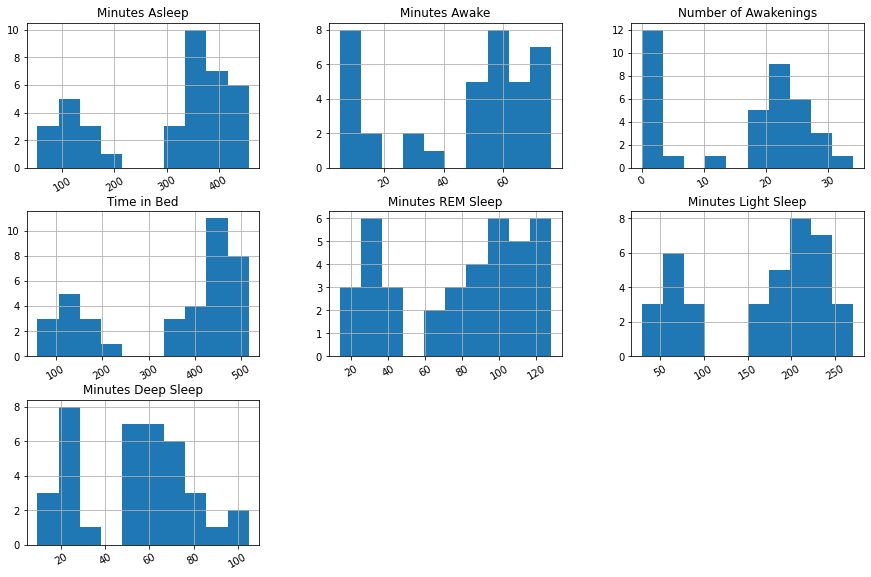

In [29]:
# analysis sleep_df 
sleep_df.hist(figsize = (15,20), layout = (6,3), xrot = 30);

In [30]:
sleep_df.describe()

,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,297.763158,45.868421,15.473684,343.763158,78.109165,166.118138,53.535855
std,131.111348,24.376740,11.336945,153.960057,36.858318,75.576514,25.889910
min,52.000000,5.000000,0.000000,60.000000,13.640628,29.010114,9.349258
25%,142.500000,21.000000,1.000000,156.750000,37.240316,79.498870,25.620562
50%,357.000000,55.500000,20.500000,422.000000,86.500000,193.500000,59.000000
75%,402.000000,64.500000,23.750000,458.250000,109.774209,222.750000,70.645013
max,458.000000,76.000000,34.000000,516.000000,128.000000,271.000000,105.000000


## 1.3. How sound is the sleep for the month

,count,mean,std,min,25%,50%,75%,max
Time in Bed,38.0,5.729386,2.566001,1.0,2.6125,7.033333,7.6375,8.6


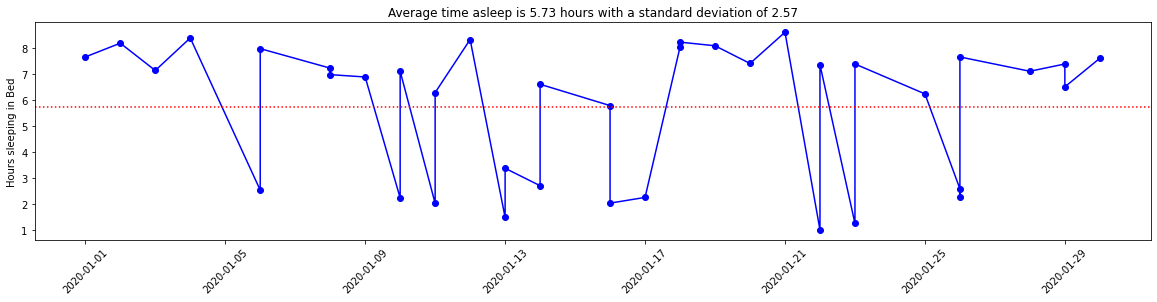

In [31]:
sleep_des_df = pd.DataFrame(sleep_df['Time in Bed']/60).describe().transpose() # Convering min to hrs
mean_sleep = round(sleep_des_df.at['Time in Bed','mean'],2)
std_sleep = round(sleep_des_df.at['Time in Bed','std'],2)
min_sleep = (round(sleep_des_df.at['Time in Bed','min'],2))
max_sleep = (round(sleep_des_df.at['Time in Bed','max'],2))
time_sleeping_bed_sr = (sleep_df['Time in Bed']/60).round(2)
hour_range_sr = pd.Series(np.arange(min_sleep,max_sleep+1))
date_sr = sleep_df['Start Time'].dt.date

sleep_title = f'Average time asleep is {mean_sleep} hours with a standard deviation of {std_sleep}'


plt.figure(figsize=(20, 4))
plt.plot(date_sr,time_sleeping_bed_sr,marker='o', color='blue')
plt.xticks(rotation=45)
plt.title(sleep_title)
plt.ylabel('Hours sleeping in Bed')
plt.axhline(mean_sleep,color='red',linestyle='dotted')
plt.plot()

sleep_des_df

the trend shows for most of the days the sleeping hours was greater than the mean sleeping hour i.e. 5.73 hrs with standard deviation of 2.57 hrs

## 1.4. How is the sleep in hourly basis.

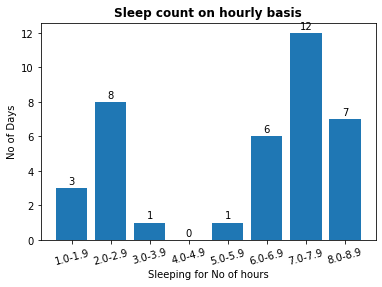

In [32]:
# Let's explore how is the sleep in hourly basis
fig, ax = plt.subplots()

plt.xlabel('Sleeping for No of hours')
plt.ylabel('No of Days')
plt.title('Sleep count on hourly basis', fontweight='bold')

days,hours = np.histogram(time_sleeping_bed_sr,bins=hour_range_sr)

x = np.arange(len(days))

bars = ax.bar(x, days)
for bar in bars:
  # print(bar.get_height(), bar.get_x(),bar.get_width())
  height = bar.get_height()
  ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 2) ,  # 3 points vertical offset
                    textcoords="offset points", ha='center', va='bottom')

ax.set_xticklabels([f'{v}-{v+0.9}' for v in np.arange(0.0,9.0)])
plt.xticks(rotation=15)
plt.show()


So, the trend shows that for the month almost about 7 to 8 hr of sleep was observerd for 12 days, but at the same time just 2 to 3 hrs sleep was observed for nearly 8 days. Also never had a sleep of 4-5 hrs, was either less than it or more than it.

## 1.5. Study Bed time and Wakeup time.

In [33]:
sleep_start = sleep_df['Start Time']
sleep_start_new = sleep_start.apply(lambda row: (row.hour + 1) if (row.minute > 30) else (row.hour + 0.5))
# pd.concat([sleep_start,sleep_start_new],axis=1) # just to verify values

sleep_end = sleep_df['End Time']
sleep_end_new = sleep_end.apply(lambda row: (row.hour + 1) if (row.minute > 30) else (row.hour + 0.5))
# pd.concat([sleep_end,sleep_end_new],axis=1) # just to verify values

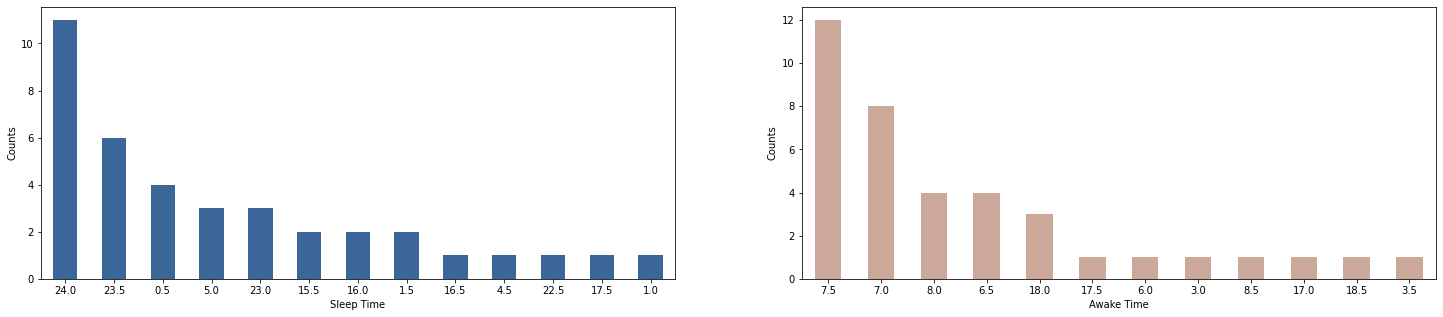

In [34]:
fig = plt.figure(figsize = (25,5))
ax1 = plt.subplot(1,2,1)
ax1 = pd.value_counts(sleep_start_new).plot.bar(cmap='GnBu_r',alpha=0.8) 
plt.xlabel('Sleep Time')
plt.ylabel('Counts')
plt.xticks(rotation=0)

ax2 = plt.subplot(1,2,2)
ax2 = pd.value_counts(sleep_end_new).plot.bar(cmap='Oranges_r',alpha=0.4) 
plt.xlabel('Awake Time')
plt.ylabel('Counts')
plt.xticks(rotation=0)

plt.show();

From the above data it is evident that for most of the times bed time starts at 12:00 am at night and ends at about 7:30 am in morning.  

## 1.6. Study actual sleeping time vs Time in Bed (in hours)

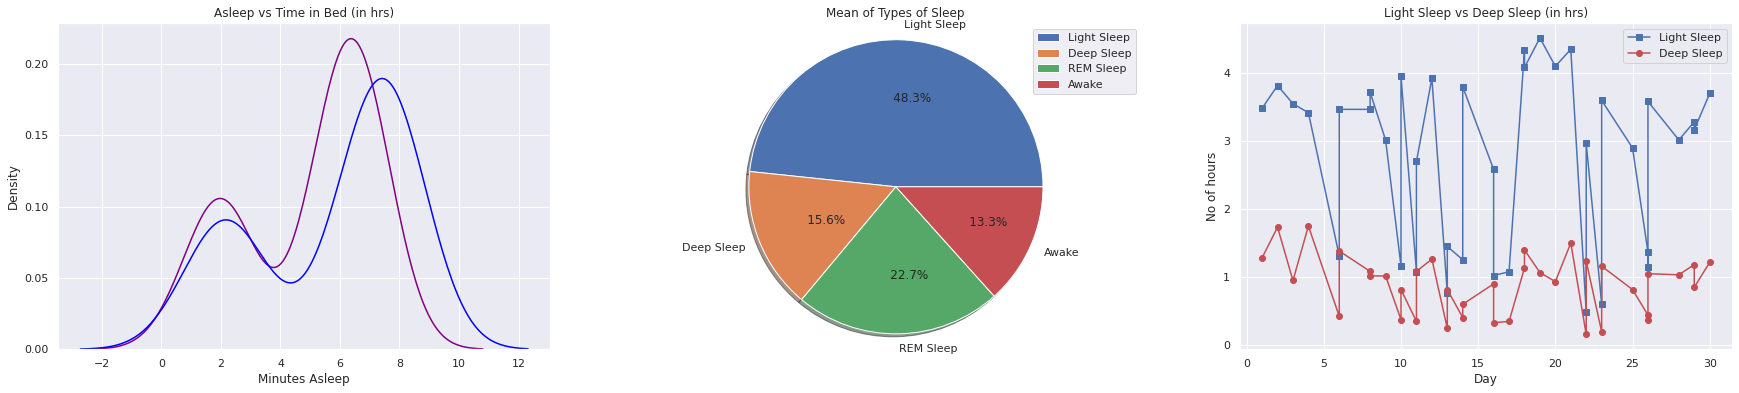

In [44]:
# Asleep vs Time in Bed (in hours)
sns.set()

fig = plt.figure(figsize = (30,6))
ax1 = plt.subplot(1,3,1)


sns.kdeplot(sleep_df['Minutes Asleep']/60, color = 'purple')
sns.kdeplot(sleep_df['Time in Bed']/60, color = 'blue')
plt.title('Asleep vs Time in Bed (in hrs)', fontsize=12)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
ax2 = plt.subplot(1,3,2)
sleep_pattern_sr = sleep_df[['Minutes Light Sleep', 
          'Minutes Deep Sleep',
          'Minutes REM Sleep',
          'Minutes Awake']].mean()
labels = ['Light Sleep','Deep Sleep', 'REM Sleep', 'Awake']
ax2.pie(sleep_pattern_sr, labels=labels, autopct='%10.1f%%', shadow=True)
ax2.axis('equal')
plt.title('Mean of Types of Sleep', fontsize=12)
ax2.legend()
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
ax3 = plt.subplot(1,3,3)
type_sleep_df = pd.concat([sleep_df['Start Time'].dt.day, 
              sleep_df['Minutes Light Sleep']/60,
              sleep_df['Minutes Deep Sleep']/60],
             axis=1) 

ax3.plot(type_sleep_df['Start Time'],type_sleep_df['Minutes Light Sleep'],'s-b')
ax3.plot(type_sleep_df['Start Time'],type_sleep_df['Minutes Deep Sleep'],'o-r')
plt.xlabel('Day')
plt.ylabel('No of hours')
plt.legend(['Light Sleep', 'Deep Sleep'])
plt.title('Light Sleep vs Deep Sleep (in hrs)', fontsize=12)
plt.xticks(rotation=0)
plt.show()

## 1.7. Correlation among Sleeping Stages

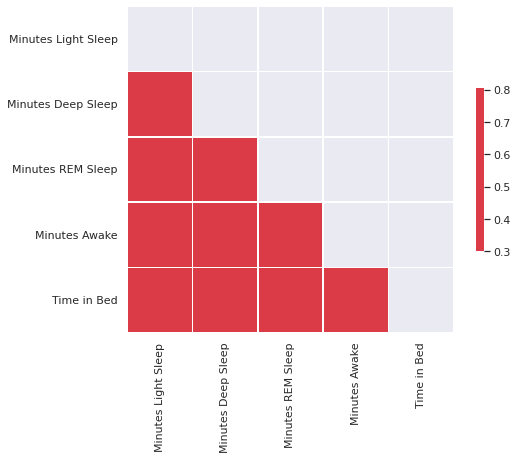

,Minutes Light Sleep,Minutes Deep Sleep,Minutes REM Sleep,Minutes Awake,Time in Bed
Minutes Light Sleep,1.000000,0.835708,0.804936,0.933894,0.971954
Minutes Deep Sleep,0.835708,1.000000,0.887939,0.811500,0.919427
Minutes REM Sleep,0.804936,0.887939,1.000000,0.809472,0.911983
Minutes Awake,0.933894,0.811500,0.809472,1.000000,0.947064
Time in Bed,0.971954,0.919427,0.911983,0.947064,1.000000


In [36]:
sleep_type_sr = sleep_df[[
          'Minutes Light Sleep', 
          'Minutes Deep Sleep',
          'Minutes REM Sleep',
          'Minutes Awake',
          'Time in Bed',]].corr().abs()


mask = np.zeros_like(sleep_type_sr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(8, 6))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(sleep_type_sr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
plt.show()
sleep_type_sr

# 2. Activity Analysis and Visualization

In [37]:
# Activity Summary
activities_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Calories Burned,31.0,2443.096774,259.293059,1904.00,2335.500,2457.00,2576.00,3048.0
Steps,31.0,10384.709677,3734.937895,4356.00,7657.500,9689.00,13139.50,18572.0
Distance,31.0,6.562581,2.374989,2.74,4.815,6.09,8.34,11.7
Minutes Sedentary,31.0,570.451613,136.625727,350.00,493.500,547.00,618.00,942.0
Minutes Lightly Active,31.0,373.483871,68.239710,251.00,321.500,357.00,435.00,515.0
Minutes Fairly Active,31.0,34.064516,22.368036,0.00,18.500,27.00,48.00,85.0
Minutes Very Active,31.0,32.741935,29.371151,0.00,4.500,36.00,57.00,112.0
Activity Calories,31.0,1494.612903,325.603304,835.00,1350.000,1512.00,1676.50,2288.0


## 2.1. Weekdays vs Weekend Activity Analysis

In [38]:
weekday_sr = activities_df['Date'].apply(lambda x: x.weekday())
weekend_sr = weekday_sr.apply(lambda x: 0 if x<5 else 1) # weekdays:0, weekends:1

week_days = {0:'Mo',1:'Tu',2:'We',3:'Th',4:'Fr',5:'Sa',6:'Su'}
weekday_sr.apply(lambda x: days[x])

date_grp_weekday_sr = activities_df.groupby(weekday_sr)
date_grp_weekday_mean = date_grp_weekday_sr.mean()

data_grp_weekend_sr = activities_df.groupby(weekend_sr)
date_grp_weekend_mean = data_grp_weekend_sr.mean()

In [50]:
# Utility: Simple Function to plot dynamic graph 

def draw_plot(df, labels, graph='bar'):
  features = df.columns
  # labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
  fig = plt.figure(figsize = (20,20))
  fig.subplots_adjust(hspace=0.5, wspace=0.4)
  for idx,plot in enumerate(features):
      ax = fig.add_subplot(3, 3, idx+1)
      f_name=features[idx]
      data = df[f_name]

      plt.title(f'Mean weelky distribution of {f_name}')
      color_lst = list('rgbkymc')
      if graph == 'pie':
        plt.xlabel(f_name)        
        plt.pie(data, labels=labels, autopct='%10.1f%%', shadow=True)
      else:
        plt.xlabel('Days of Week')
        plt.ylabel(f_name)        
        plt.bar(labels, data, color = color_lst)
      
  plt.show()     


## 2.1.1  How was the daily performance for complete week

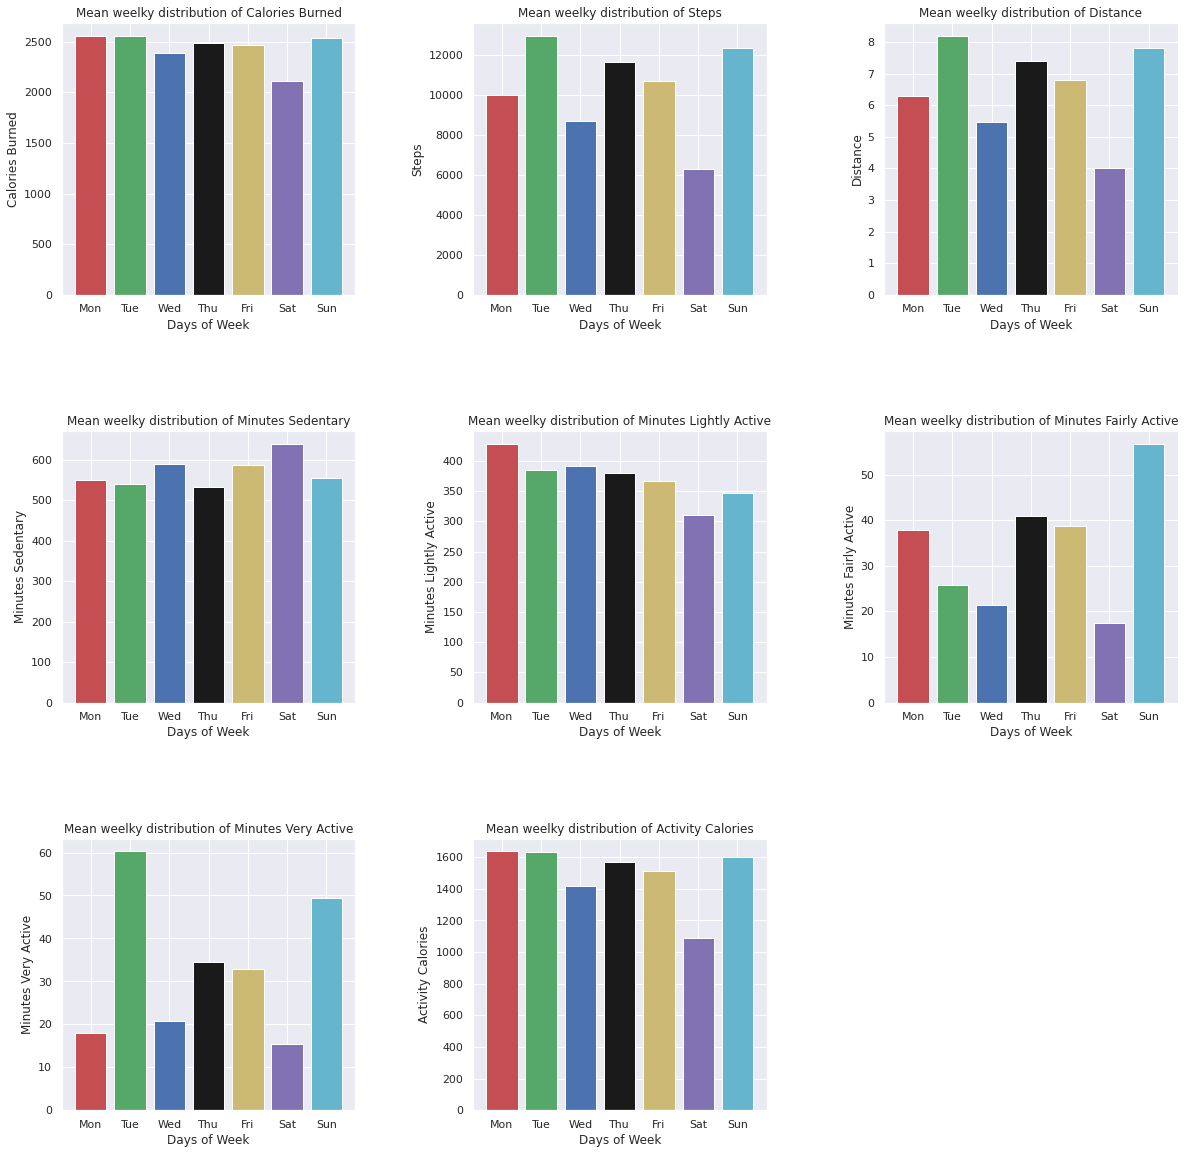

,Calories Burned,Steps,Distance,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Date,,,,,,,,
0,2552.75,10001.50,6.3025,550.50,428.50,37.75,18.00,1636.25
1,2555.75,12958.75,8.1850,540.50,385.50,25.75,60.25,1631.00
2,2384.20,8687.60,5.4640,588.20,391.20,21.40,20.80,1420.60
3,2490.20,11660.40,7.3900,533.60,380.20,40.80,34.60,1569.20
4,2464.60,10732.40,6.8080,587.00,367.20,38.80,33.00,1511.20
5,2116.00,6300.25,4.0025,639.25,310.00,17.50,15.50,1090.00
6,2535.75,12370.50,7.7925,554.75,347.25,56.75,49.50,1599.75


In [51]:
label_lst = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
draw_plot(date_grp_weekday_mean, label_lst )

date_grp_weekday_mean

## 2.1.2  Compare performance between week days and week ends

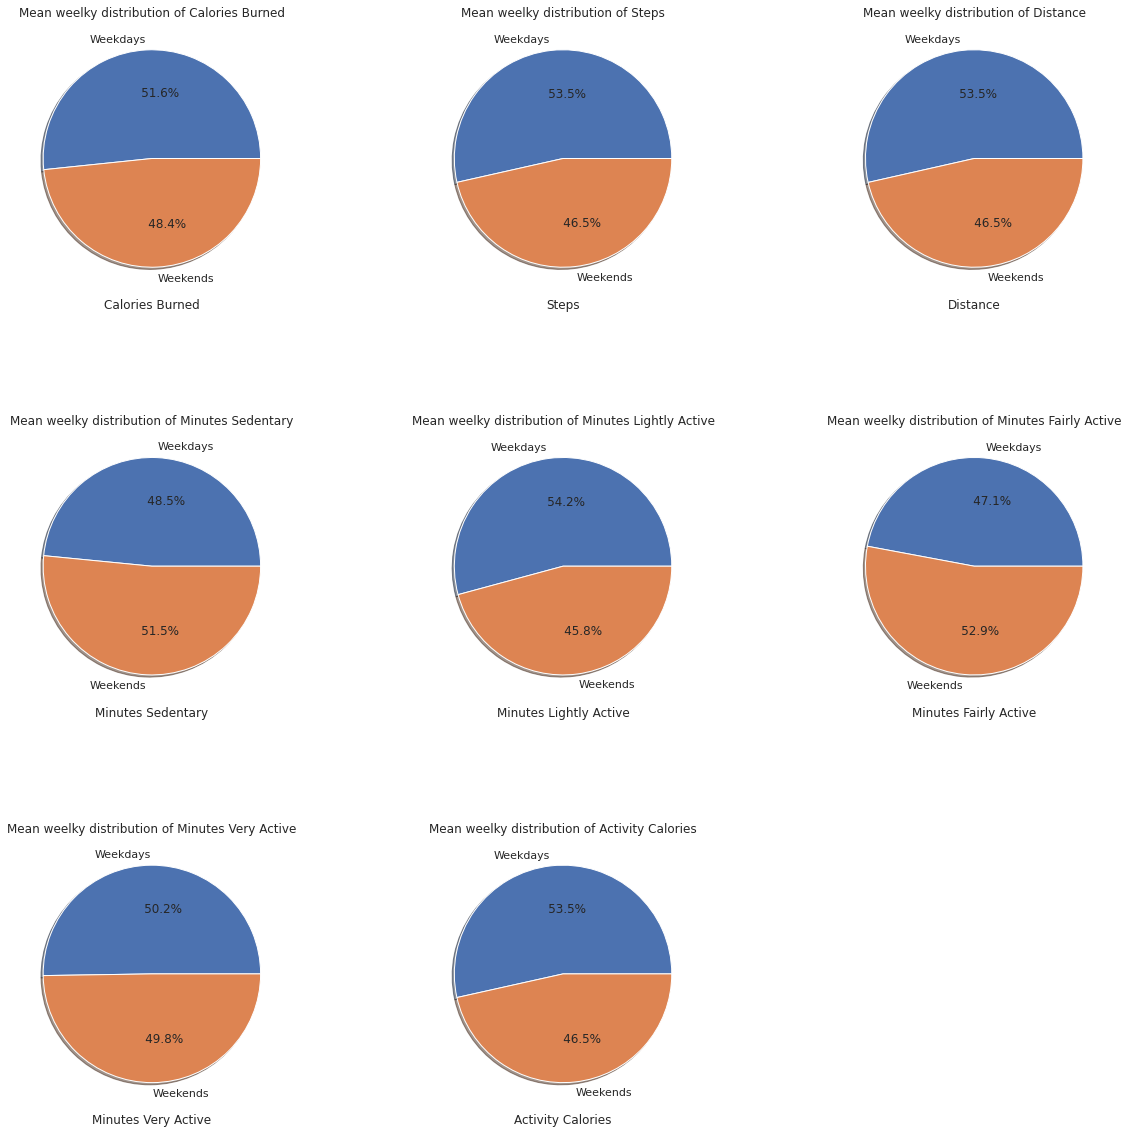

,Calories Burned,Steps,Distance,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Date,,,,,,,,
0,2483.869565,10749.695652,6.793913,561.217391,389.086957,33.000,32.826087,1546.695652
1,2325.875000,9335.375000,5.897500,597.000000,328.625000,37.125,32.500000,1344.875000


In [52]:
label_lst = ['Weekdays', 'Weekends']
draw_plot(date_grp_weekend_mean, label_lst, 'pie')

date_grp_weekend_mean

## 2.2.  Correlation plot for varoius activities

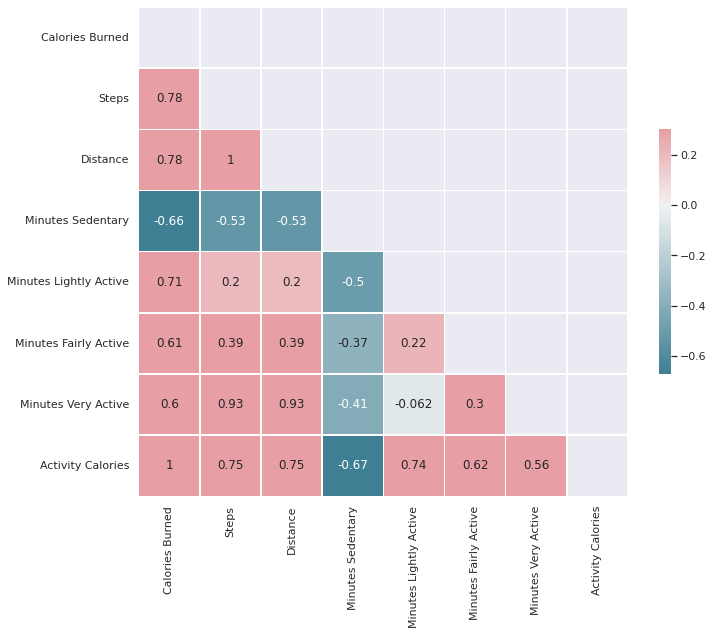

,Calories Burned,Steps,Distance,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Calories Burned,1.000000,0.778810,0.777281,-0.661619,0.706567,0.608420,0.599433,0.997282
Steps,0.778810,1.000000,0.999733,-0.534021,0.204252,0.390967,0.926356,0.749281
Distance,0.777281,0.999733,1.000000,-0.531073,0.199120,0.391566,0.929447,0.747338
Minutes Sedentary,-0.661619,-0.534021,-0.531073,1.000000,-0.499837,-0.369114,-0.408856,-0.670590
Minutes Lightly Active,0.706567,0.204252,0.199120,-0.499837,1.000000,0.222705,-0.062485,0.735371
Minutes Fairly Active,0.608420,0.390967,0.391566,-0.369114,0.222705,1.000000,0.301154,0.619579
Minutes Very Active,0.599433,0.926356,0.929447,-0.408856,-0.062485,0.301154,1.000000,0.561052
Activity Calories,0.997282,0.749281,0.747338,-0.670590,0.735371,0.619579,0.561052,1.000000


In [42]:
# Correlation plot
corr = activities_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()
corr

In [43]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ #